### Disney recommendation modelling

Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Disney+, along with details such as - show_id, type, title, country, cast, date_added, directors, ratings, release year and duration.


**Dataset Info -** The Dataset contains 1,535 rows and 15 columns, 1 ID Column and others described below.

- **id**: The title ID on JustWatch
- **title**: The name of the title
- **show_type**: TV show or movie
- **description**: A brief description
- **release_year**: The release year
- **age_certification**: The age certification
- **runtime**: The length of the episode (SHOW) or movie
- **genres**: A list of genres
- **production_countries**: A list of countries that produced the title
- **seasons**: Number of seasons if it's a SHOW
- **imdb_id**: The title ID on IMDB
- **imdb_score**: Score on IMDB
- **imdb_votes**: Votes on IMDB
- **tmdb_popularity**: Popularity on TMDB
- **tmdb_score**: Score on TMDB



- **Goal**

The goal of this project is to develop a recommendation system for Disney Plus, enhancing user experience by efficiently helping them discover new shows and movies of their interest. Currently, users may struggle to find content that matches their personal preferences due to the extensive library available. An effective recommendation system can not only increase user engagement but also improve overall satisfaction by facilitating personalized discovery of relevant content.

- **ML Problem Statement**

The associated ML problem is to develop a recommendation model capable of analyzing the viewing history and preferences of Disney Plus users to predict and recommend new shows and movies they are likely to enjoy. This is a collaborative filtering-based item recommendation problem aimed at delivering accurate and relevant recommendations to enhance user discovery experience on the streaming service.

## Importing the libraries :

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import lets_plot as lp

## Loading the dataset :

In [73]:
file_path = r'C:\Users\Bianca\Documents\GitHub\disney_recommendation\titles.csv'
disney_plus = pd.read_csv(file_path)

In [74]:
disney_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1535 non-null   object 
 1   title                 1535 non-null   object 
 2   type                  1535 non-null   object 
 3   description           1529 non-null   object 
 4   release_year          1535 non-null   int64  
 5   age_certification     1210 non-null   object 
 6   runtime               1535 non-null   int64  
 7   genres                1535 non-null   object 
 8   production_countries  1535 non-null   object 
 9   seasons               415 non-null    float64
 10  imdb_id               1133 non-null   object 
 11  imdb_score            1108 non-null   float64
 12  imdb_votes            1105 non-null   float64
 13  tmdb_popularity       1524 non-null   float64
 14  tmdb_score            1426 non-null   float64
dtypes: float64(5), int64(

In [75]:
disney_plus.head(3) # Exibe as primeiras 3 linhas por padrão

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1


In [76]:
disney_plus.nunique() # Retorna o número de valores únicos em cada coluna

id                      1535
title                   1500
type                       2
description             1528
release_year              91
age_certification          9
runtime                  157
genres                   621
production_countries      70
seasons                   15
imdb_id                 1133
imdb_score                66
imdb_votes              1003
tmdb_popularity         1445
tmdb_score                62
dtype: int64

In [77]:
disney_plus.isnull().sum()

id                         0
title                      0
type                       0
description                6
release_year               0
age_certification        325
runtime                    0
genres                     0
production_countries       0
seasons                 1120
imdb_id                  402
imdb_score               427
imdb_votes               430
tmdb_popularity           11
tmdb_score               109
dtype: int64

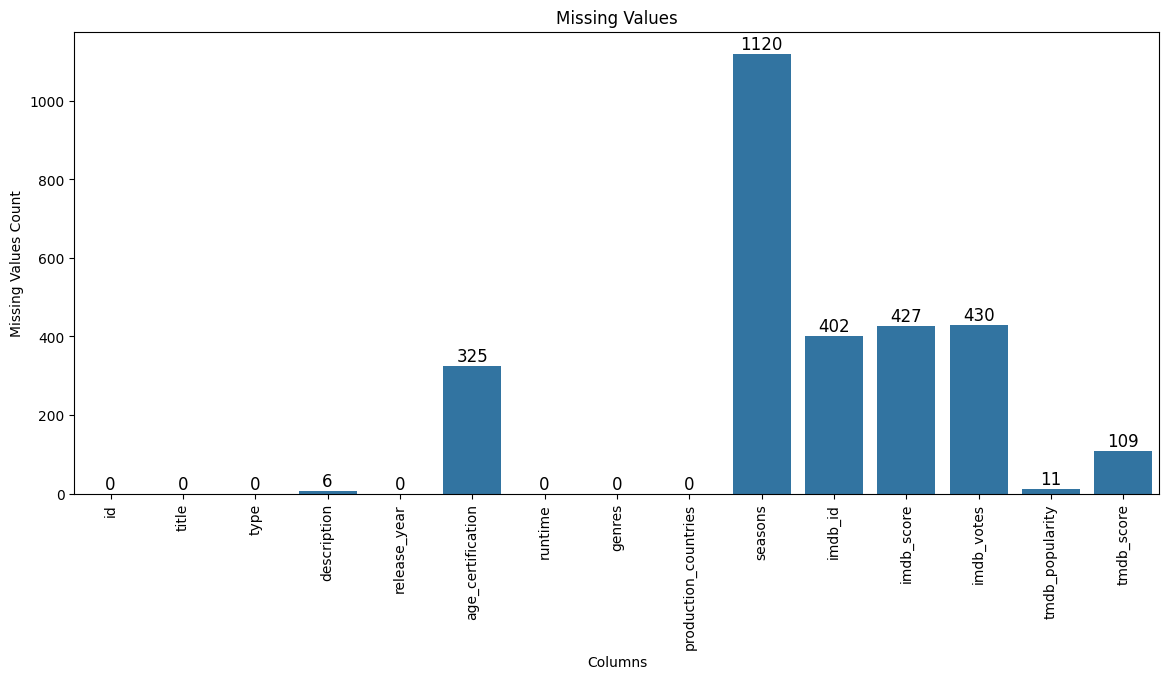

In [78]:
missing_values_count = disney_plus.isnull().sum()

# Configura o tamanho da figura
plt.figure(figsize=(14, 6))

# Cria o gráfico de barras
sns.barplot(x=missing_values_count.index, y=missing_values_count)

# Adiciona título ao gráfico
plt.title("Missing Values")

# Configurações adicionais para o eixo x, eixo y e rotação dos rótulos no eixo x
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=90)

# Adiciona os valores numéricos acima das barras
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2,
            int(height), fontsize=12, ha='center', va='bottom')

# Exibe o gráfico
plt.show()


In [79]:
len(disney_plus.loc[(disney_plus['seasons'].isna()) & (disney_plus['type'] == 'MOVIE')]) == disney_plus.seasons.isna().sum()

True

In [80]:
disney_plus['seasons'].fillna(0, inplace=True)

C:\Users\Bianca\AppData\Local\Temp\ipykernel_3692\2508695517.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  disney_plus['seasons'].fillna(0, inplace=True)


In [81]:
disney_plus.drop(['imdb_id','age_certification'], axis=1,inplace=True)

In [82]:
disney_plus.dropna(inplace=True)

In [83]:
disney_plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1057 entries, 0 to 1531
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1057 non-null   object 
 1   title                 1057 non-null   object 
 2   type                  1057 non-null   object 
 3   description           1057 non-null   object 
 4   release_year          1057 non-null   int64  
 5   runtime               1057 non-null   int64  
 6   genres                1057 non-null   object 
 7   production_countries  1057 non-null   object 
 8   seasons               1057 non-null   float64
 9   imdb_score            1057 non-null   float64
 10  imdb_votes            1057 non-null   float64
 11  tmdb_popularity       1057 non-null   float64
 12  tmdb_score            1057 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 115.6+ KB


In [84]:
disney_plus.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,120,"['animation', 'family', 'music', 'fantasy']",['US'],0.0,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],0.0,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],0.0,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,70,"['animation', 'drama', 'family']",['US'],0.0,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,96,"['family', 'action']","['GB', 'US']",0.0,6.9,8229.0,10.698,6.5


In [85]:
# Limpeza dos dados de gênero
disney_plus['genres'] = disney_plus['genres'].str.replace(r'\[|\]', '').str.replace(r"'", '')
disney_plus['genre'] = disney_plus['genres'].str.split(',').str[0]

# Limpeza dos dados de países de produção
disney_plus['production_countries'] = disney_plus['production_countries'].str.replace(r'\[|\]', '').str.replace(r"'", '')
disney_plus['production_country'] = disney_plus['production_countries'].str.split(',').str[0]

# Remover colunas originais
disney_plus.drop(['genres', 'production_countries'], axis=1, inplace=True)


In [86]:
disney_plus.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,120,0.0,7.7,94681.0,57.751,7.4,[animation,[US]
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,83,0.0,7.6,195321.0,107.137,7.1,[fantasy,[US]
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,88,0.0,7.5,141937.0,71.160,7.1,[animation,[US]
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,70,0.0,7.3,140406.0,68.136,7.0,[animation,[US]
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,96,0.0,6.9,8229.0,10.698,6.5,[family,[GB


In [87]:
disney_plus['genre'].unique()

array(['[animation', '[fantasy', '[family', '[comedy', '[action',
       '[romance', '[scifi', '[music', '[western', '[drama', '[]',
       '[documentation', '[family]', '[comedy]', '[crime', '[drama]',
       '[horror', '[documentation]', '[thriller', '[history', '[reality',
       '[animation]', '[reality]', '[music]', '[fantasy]', '[war',
       '[scifi]'], dtype=object)

In [88]:
disney_plus['production_country'].unique()

array(['[US]', '[GB', '[GB]', '[CA', '[CA]', '[]', '[US', '[FR]', '[SE',
       '[JP', '[FR', '[SUHH]', '[AU', '[NZ', '[DE', '[PL', '[SG', '[ES',
       '[DE]', '[HK', '[CN]', '[AR]', '[IN', '[CI', '[NL]', '[MX', '[BE',
       '[IT]', '[CN', '[AU]', '[JP]', '[DK', '[PH]', '[BR', '[IN]',
       '[NZ]', '[ZA', '[KR]'], dtype=object)

In [89]:
disney_plus['genre'] = disney_plus['genre'].replace('', np.nan)
disney_plus['production_country'] = disney_plus['production_country'].replace('',np.nan)

# Estatísticas descritivas

In [90]:
disney_plus.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1057.000000,1057.000000,1057.000000,1057.000000,1.057000e+03,1057.000000,1057.000000
mean,2005.551561,72.549669,0.908231,6.590634,7.969956e+04,52.080720,6.976348
std,16.942400,37.739232,2.272634,1.055611,1.921219e+05,314.376264,1.055652
min,1937.000000,1.000000,0.000000,1.600000,5.000000e+00,0.600000,1.000000
25%,2000.000000,42.000000,0.000000,5.900000,6.260000e+02,5.430000,6.300000
50%,2011.000000,84.000000,0.000000,6.600000,5.099000e+03,12.657000,7.000000
75%,2018.000000,99.000000,1.000000,7.300000,4.572300e+04,35.172000,7.600000
max,2022.000000,182.000000,34.000000,9.700000,1.353907e+06,9323.832000,10.000000


## Categóricas

In [91]:
disney_plus.describe(include = [object])

,id,title,type,description,genre,production_country
count,1057,1057,1057,1057,1057,1057
unique,1057,1024,2,1056,27,38
top,tm74391,Freaky Friday,MOVIE,Discover what it’s like to report to work ever...,[comedy,[US]
freq,1,3,731,2,228,886


In [ ]:
## remover titulos duplicados

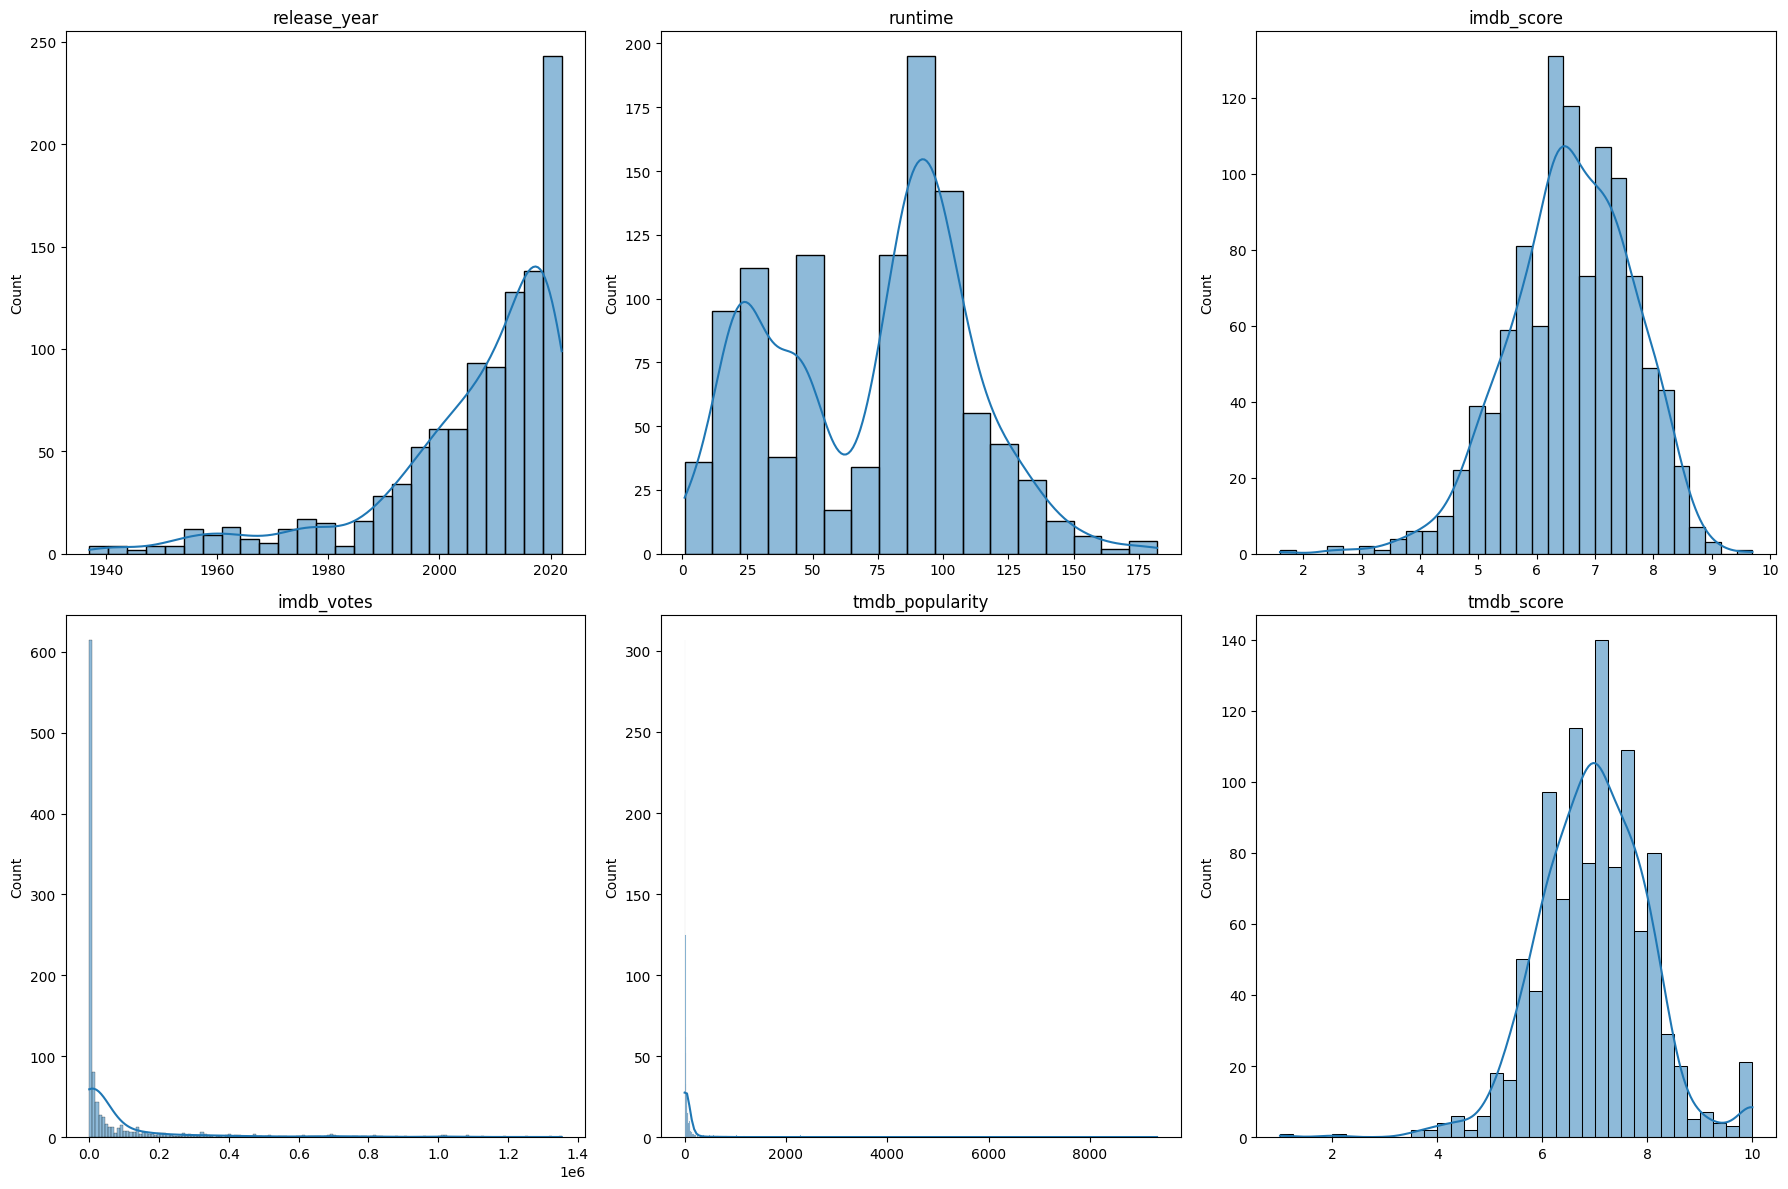

In [92]:
variables = ['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

columns = 3
rows = 2
fig, axes = plt.subplots(rows, columns, figsize=(18, 12))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(disney_plus[variable], ax=axes[i][j], kde=True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()
plt.show()

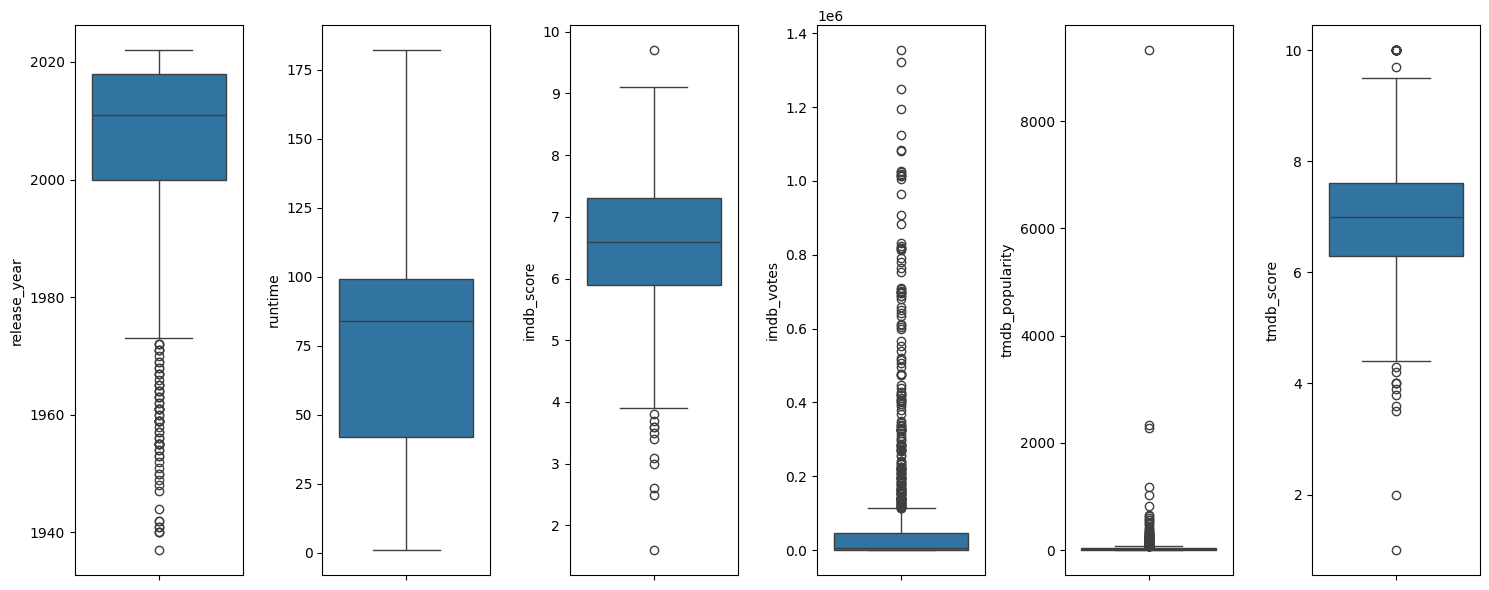

In [93]:
variables = ['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=disney_plus, ax = ax)
plt.tight_layout()

In [94]:
categorical_vars = ['type', 'age_certification', 'genres', 'production_countries', 'seasons']